# S.I.R Model - Custom Implementation

The S.I.R (Susceptible, Infected, Removed) system of ODEs is a simple epidemiological model that can describe the spread of an infectious disease throughout a population. The three possible states can be described as follows:
1. Susceptible - members of the population that are not infected, but not immune
2. Infected - members of the population that are currently infected
3. Removed - members of the population that have survived and gained immunity to the disease

The state vector is thus described by:

$$
\vec{u}(t) = \begin{bmatrix}
s(t)
\\i(t)
\\r(t)
\end{bmatrix}$$

and the state derivative is as follows

$$\frac{d\vec{u}(t)}{dt} = 

\begin{bmatrix}
-\beta s(t) i(t)
\\ \beta s(t)i(t) - \kappa i(t)
\\ \kappa i(t)
\end{bmatrix}

=

\begin{bmatrix}
-\beta u_{0} u_{1}
\\ \beta u_{0}u_{1} - \kappa u_{1}
\\ \kappa u_{1}
\end{bmatrix}
$$

where

$\beta$ = infection rate $[days^{-1}]$

$\kappa$ = removal rate $[days^{-1}]$

100%|██████████| 29999/29999 [00:00<00:00, 67740.13it/s]


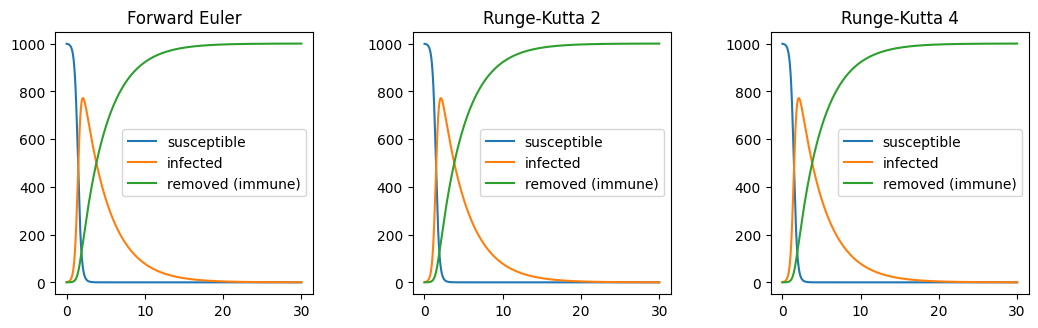

In [1]:
import numerical_tools as nt
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# SIR state derivative
def du(t, u, *args):
    # Expects u = [s, i, r] at a given time step
    # Expects args[0] = beta, args[1] = kappa
    du = np.array([
        -args[0]*u[0,0]*u[1,0],
        args[0]*u[0,0]*u[1,0] - args[1]*u[1,0],
        args[1]*u[1,0]
    ]).reshape(3,1)
    return du

# SIR Jacobian (unused currently)
def J(u, dt, *args):
    # Expects u = [s, i, r] at a given time step
    # Expects args[0] = beta, args[1] = kappa
    J = np.array([
            [1+args[0]*u[1,0]*dt, args[0]*u[0,0]*dt, 0],
            [-args[0]*u[1,0]*dt, 1-dt*(args[0]*u[0,0]-args[1]), 0],
            [0, -args[1]*dt, 1]
        ]).reshape(3,3)
    return J

# Initialize
s0 = 1000 # number of people
i0 = 1 # number infected
r0 = 0 # number recovered
beta = .005 # infection rate (per day)
kappa = .3 # recovery rate (per day)
dt = .001

# Time array
t = np.arange(0.0, 30.0, dt)

# generate empty state arrays (3 x time) matrix, where each column is u[0], u[1], u[2] at given time step.
u_array_fe =  np.zeros((3, len(t)))
# u_array_be =  np.zeros((3, len(t)))
u_array_rk2 = np.zeros((3, len(t))) 
u_array_rk4 = np.zeros((3, len(t))) 

# initialize the state array at t = 0

u_array_fe[:,0]  = np.array([s0, i0, r0])
# u_array_be[:,0]  = np.array([s0, i0, r0])
u_array_rk2[:,0] = np.array([s0, i0, r0])
u_array_rk4[:,0] = np.array([s0, i0, r0])

# integrate for time range for each method:
for i in tqdm(range(len(t)-1)):
    u_array_fe[:, i+1, None] = nt.fe(u_array_fe[:, i, None], du, t, dt, beta, kappa)

# for i in tqdm(range(len(t)-1)):
#     u_array_be[:, i+1, None] = nt.be(u_array_be[:, i, None], du, dt, J, beta, kappa, tol = 0.001, iter = 1000)

for i in tqdm(range(len(t)-1)):
    u_array_rk2[:, i+1, None] = nt.rk2(u_array_rk2[:, i, None], du, t, dt, beta, kappa)

for i in tqdm(range(len(t)-1)):
    u_array_rk4[:, i+1, None] = nt.rk4(u_array_rk4[:, i, None], du, t, dt, beta, kappa)


# Plot results:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=1.1)
fig.set_figheight(3)
fig.set_figwidth(11)

ax[0].set_title("Forward Euler")
ax[0].plot(t, u_array_fe.transpose(), label=["susceptible", "infected", "removed (immune)"])
ax[0].legend()

# ax[0, 1].set_title("Backward Euler")
# ax[0, 1].plot(t, u_array_be, label=["s", "i", "r"])
# ax[0, 1].legend()

ax[1].set_title("Runge-Kutta 2")
ax[1].plot(t, u_array_rk2.transpose(), label=["susceptible", "infected", "removed (immune)"])
ax[1].legend()

ax[2].set_title("Runge-Kutta 4")
ax[2].plot(t, u_array_rk4.transpose(), label=["susceptible", "infected", "removed (immune)"])
ax[2].legend()

plt.show()